# __Heart Disease Prediction – Part 3__

# __Decision Trees__

## __Importing the Necessary Libraries__

In [74]:
import numpy as np
import pandas as pd

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split, KFold, cross_val_score  # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import confusion_matrix, classification_report, auc, roc_curve
from sklearn.ensemble import RandomForestClassifier

import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams

## __Using the stored df from part 1__

In [2]:
%store -r df_shuffle
df = df_shuffle
df.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,39,0,2,94,199,0,1,179,0,0.0,2,0,2,1
1,54,0,2,135,304,1,1,170,0,0.0,2,0,2,1
2,65,1,0,120,177,0,1,140,0,0.4,2,0,3,1
3,70,1,2,160,269,0,1,112,1,2.9,1,1,3,0
4,50,1,0,144,200,0,0,126,1,0.9,1,0,3,0


## __Creating and Obtaining a Test Set__

### __Obtaining the DataSet__

In [3]:
X = df.iloc[:,:-1]
y = df['target']

### __Spliting the Dataset__

In [4]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

## __Decision Tree__

In [83]:
def getPerformanceMetric(y, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    print("tn:", tn, " fp: ", fp, " fn: ", fn, " tp: ", tp)
    print(classification_report(y, y_pred))

    fpr, tpr, _ = roc_curve(y, y_pred)
    roc_auc = auc(fpr, tpr)
    plt.figure()
    plt.figure(figsize=[6,4])
    plt.plot(fpr, tpr, label="ROC curve (area = %0.2f)" % roc_auc)
    plt.plot([0, 1], [0, 1], "--")
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend(loc="lower right")
    print()

### __J48 Algorithm__

In [58]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf_dt = clf.fit(X_train, y_train)

# Predict the response for test dataset
y_pred = clf_dt.predict(X_test)

In [59]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7142857142857143


tn: 23  fp:  17  fn:  9  tp:  42
              precision    recall  f1-score   support

           0       0.72      0.57      0.64        40
           1       0.71      0.82      0.76        51

    accuracy                           0.71        91
   macro avg       0.72      0.70      0.70        91
weighted avg       0.71      0.71      0.71        91




<Figure size 640x480 with 0 Axes>

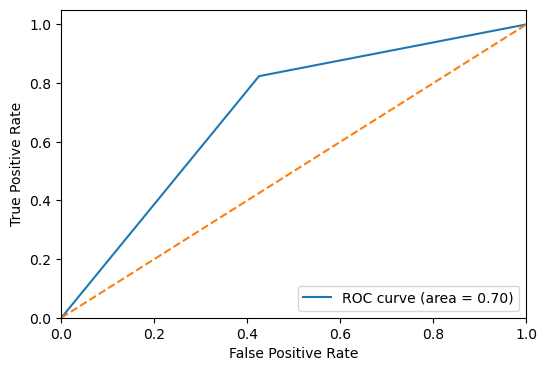

In [84]:
getPerformanceMetric(y_test, y_pred)

[Text(2287.8, 1037.7818181818182, 'X[2] <= 0.5\ngini = 0.494\nsamples = 273\nvalue = [121, 152]'),
 Text(1364.0, 938.9454545454546, 'X[11] <= 0.5\ngini = 0.392\nsamples = 127\nvalue = [93, 34]'),
 Text(843.2, 840.1090909090909, 'X[12] <= 2.5\ngini = 0.498\nsamples = 58\nvalue = [27, 31]'),
 Text(396.8, 741.2727272727273, 'X[8] <= 0.5\ngini = 0.353\nsamples = 35\nvalue = [8, 27]'),
 Text(198.4, 642.4363636363637, 'X[4] <= 316.5\ngini = 0.087\nsamples = 22\nvalue = [1, 21]'),
 Text(99.2, 543.6, 'gini = 0.0\nsamples = 20\nvalue = [0, 20]'),
 Text(297.6, 543.6, 'X[9] <= 0.6\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(198.4, 444.76363636363635, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(396.8, 444.76363636363635, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(595.2, 642.4363636363637, 'X[6] <= 0.5\ngini = 0.497\nsamples = 13\nvalue = [7, 6]'),
 Text(496.0, 543.6, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(694.4, 543.6, 'X[10] <= 1.5\ngini = 0.42\nsamples = 10\nvalue =

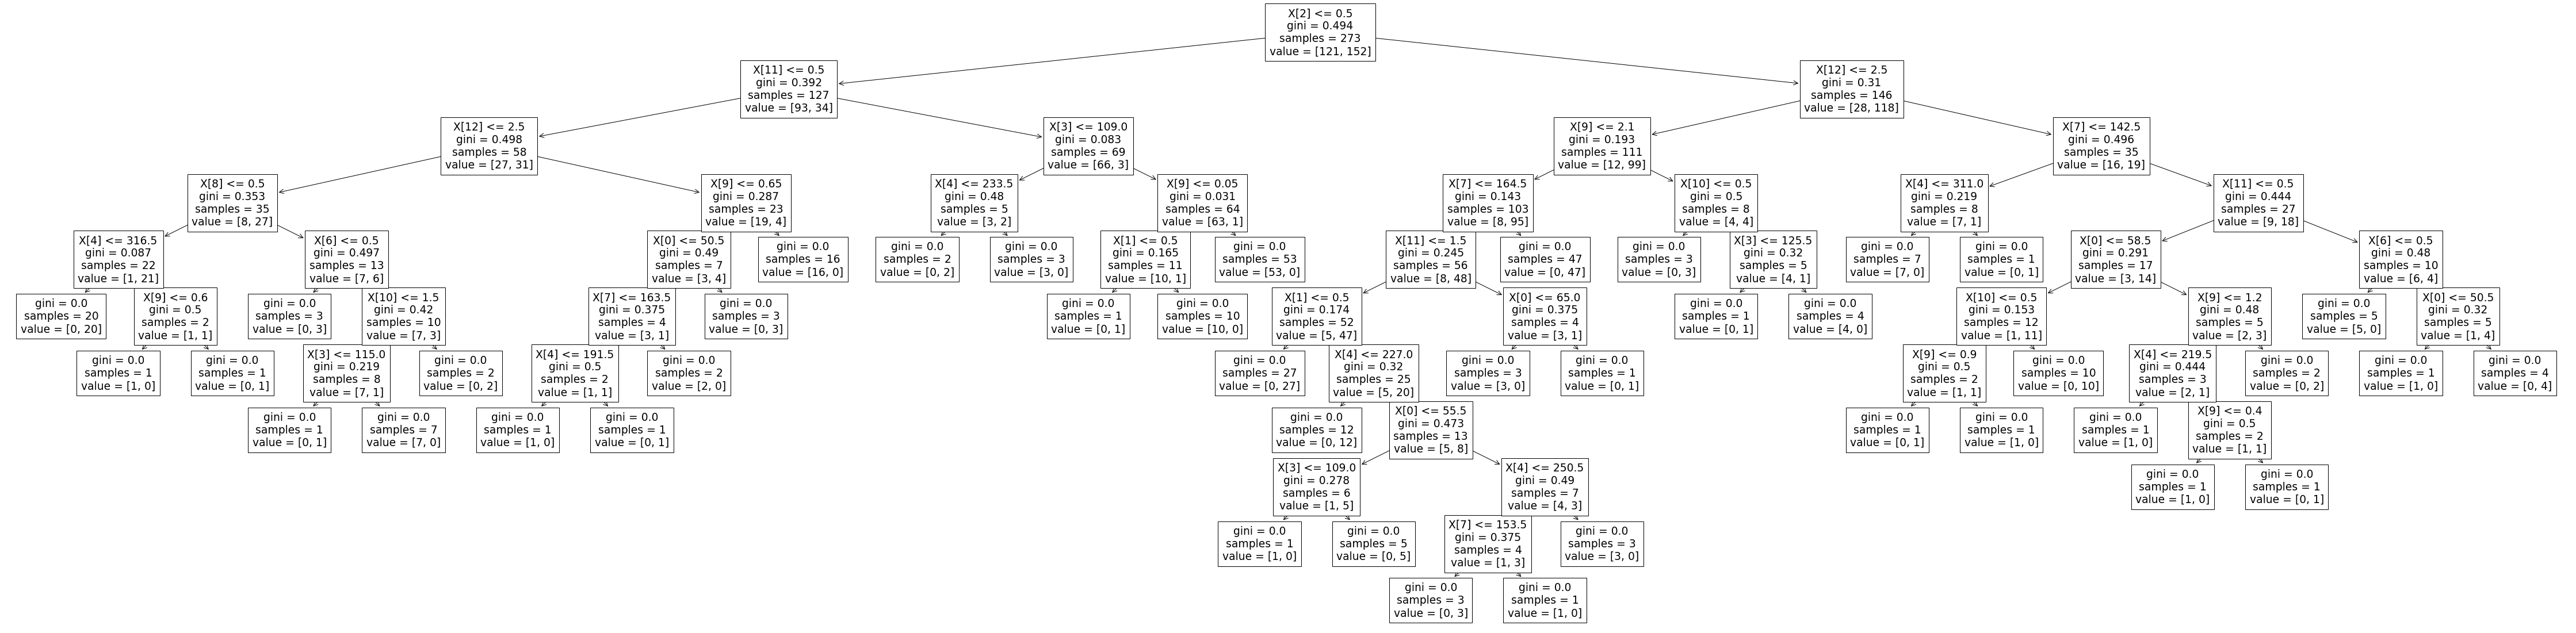

In [67]:
rcParams['figure.figsize'] = 80,20
plot_tree(clf_dt)

### __k = 10 fold Cross Validation__

accuracies = cross_val_score(estimator = clf, X = X_train, y = y_train, cv = 10) 
accuracies.mean() 
accuracies.std()
accuracies

Performance Metrics for fold: 2
tn: 8  fp:  2  fn:  6  tp:  15
              precision    recall  f1-score   support

           0       0.57      0.80      0.67        10
           1       0.88      0.71      0.79        21

    accuracy                           0.74        31
   macro avg       0.73      0.76      0.73        31
weighted avg       0.78      0.74      0.75        31


Performance Metrics for fold: 4
tn: 7  fp:  1  fn:  4  tp:  18
              precision    recall  f1-score   support

           0       0.64      0.88      0.74         8
           1       0.95      0.82      0.88        22

    accuracy                           0.83        30
   macro avg       0.79      0.85      0.81        30
weighted avg       0.86      0.83      0.84        30


Performance Metrics for fold: 6
tn: 10  fp:  4  fn:  5  tp:  11
              precision    recall  f1-score   support

           0       0.67      0.71      0.69        14
           1       0.73      0.69      0.71  

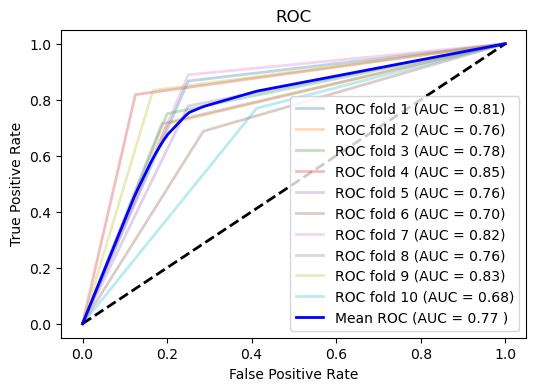

Average Accuracy: 0.7746752512193689


In [79]:
random_state = np.random.RandomState(0)
clf_cv = clf
cv = KFold(n_splits=10,shuffle=False)

fig1 = plt.figure(figsize=[6,4])
ax1 = fig1.add_subplot(111)

tprs = []
aucs = []
mean_fpr = np.linspace(0,1,100)
i = 1
for train,test in cv.split(X,y):
    prediction = clf_cv.fit(X.iloc[train],y.iloc[train]).predict_proba(X.iloc[test])
    if (i%2 == 0):
        print("Performance Metrics for fold:", i)
        tn, fp, fn, tp = confusion_matrix(y.iloc[test], prediction[:, 1]).ravel()
        print("tn:", tn, " fp: ", fp, " fn: ", fn, " tp: ", tp)
        print(classification_report(y.iloc[test], prediction[:, 1]))
        print()
    fpr, tpr, t = roc_curve(y[test], prediction[:, 1])
    tprs.append(np.interp(mean_fpr, fpr, tpr))
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i = i+1

plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')
mean_tpr = np.mean(tprs, axis=0)
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='blue',
         label=r'Mean ROC (AUC = %0.2f )' % (mean_auc),lw=2, alpha=1)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()
print("Average Accuracy:", np.mean(aucs))

## __Evaluate Predictions of The Fitted Model__

In [75]:
# Reset plots settings
matplotlib.rcParams.update(matplotlib.rcParamsDefault)

y_pred_test_dt = clf_dt.predict(X_test)

tn: 35  fp:  5  fn:  0  tp:  51
              precision    recall  f1-score   support

           0       1.00      0.88      0.93        40
           1       0.91      1.00      0.95        51

    accuracy                           0.95        91
   macro avg       0.96      0.94      0.94        91
weighted avg       0.95      0.95      0.94        91




<Figure size 640x480 with 0 Axes>

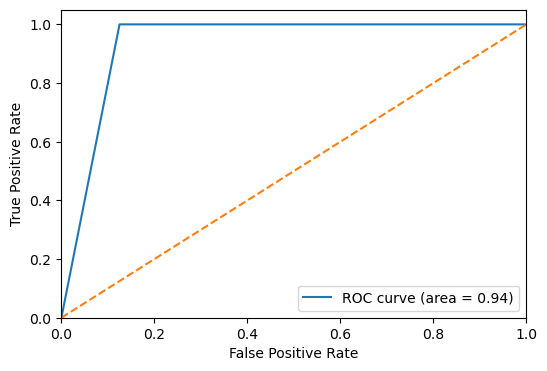

In [80]:
getPerformanceMetric(y_test, y_pred_test_dt)